# logistic回归分类器

In [1]:
# from numpy import *
# weights = ones((3,1))
# print weights

In [2]:
from numpy import *
import matplotlib.pyplot as plt

def loadDataSet(file_name):
    '''
        dataMat -- 原始数据的特征
        labelMat -- 原始数据的标签，也就是每条样本对应的类别
    '''
    
    dataMat = []
    labelMat = []
    fr = open(file_name)
    for line in fr.readlines():
        lineArr = line.strip().split()#strip移除头尾空格
        #make x0 = 1.0 x1&x2 from datamat
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        #put [2] intto label ,make an 1 x n mat
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
        return 2 * 1.0/(1+exp(-2*inX)) - 1

#原始梯度上升算法    
def gradAscent(dataMatIn,classLabels,alpha = 0.001,maxCycles =1000):
    '''
    Args:
        dataMatIn -- 输入的 数据的特征 List
        classLabels -- 输入的数据的类别标签
    Returns:
        array(weights) -- 得到的最佳回归系数= 利用cost函数得到的判定边界
    '''
    #转换为矩阵
    dataMatrix = mat(dataMatIn)
    #转换矩阵并转置
    labelMat = mat(classLabels).transpose()
    #获取样本量和特征数目
    m,n = shape(dataMatrix)
    
    
    
    #生成一个长度和特征数相同的'矩阵'
    weights = ones((n,1))
    weights_record = []
    '''
    ONES   Ones array.
    ONES(N) is an N-by-N matrix of ones.
 
    ONES(M,N) or ONES([M,N]) is an M-by-N matrix of ones.
 
    ONES(M,N,P,...) or ONES([M N P ...]) is an M-by-N-by-P-by-... array of
    ones.
 
    ONES(SIZE(A)) is the same size as A and all ones.
    '''
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error
        weights_record.append(weights.getA())
    return array(weights),weights_record

In [3]:
#优化的随机梯度上升算法
def stocGradAscent1(dataMatrix,classLabels,alphaNumrator=5,numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)#创建与列数相同的矩阵的系数矩阵
    weights_record = []
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = alphaNumrator/(1.0+j+i)+0.0001
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))#sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            weights_record.append(weights)
            del(dataIndex[randIndex])
    return array(weights),weights_record

In [4]:
#可视化
def plotBestFit(dataArr, labelMat, weights):
    #这里所有的都要使用array格式
    n = shape(dataArr)[0]#取其行数,也即数据点的个数
    xcord1 = []
    ycord1 = []
    
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0,3.0,0.1)
    '''
    dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
    w0*x0+w1*x1+w2*x2=f(x)
    x0最开始就设置为1叻， x2就是我们画图的y值，而f(x)被我们磨合误差给算到w0,w1,w2身上去了
    所以： w0+w1*x+w2*y=0 => y = (-w0-w1*x)/w2   
    这里只是分辨了x1和x2两个特征（不是label），g（c+sita x1 + sita x2） = 这个是激励函数，激励出来的在和label作差得到error
    '''
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [5]:
#学习曲线
def plotIteration(weights):
    iterTimes = len(weights)
    w0 = [i[0] for i in weights]
    w1 = [i[1] for i in weights]
    w2 = [i[2] for i in weights]
    fig = plt.figure()
    ax1 = fig.add_subplot(3,1,1)
    ax1.plot(range(iterTimes),w0,c='b')#,marker='*')
    plt.xlabel('w0')
    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(range(iterTimes),w1,c='r')#,marker='s')
    plt.xlabel('w1')
    ax3 = fig.add_subplot(3,1,3)
    ax3.plot(range(iterTimes),w2,c='g')#,marker='o')
    plt.xlabel('w2')

In [17]:
def simpleTest():
    # 1.收集并准备数据
    dataMat, labelMat = loadDataSet("5.Logistic/TestSet.txt")

#     print dataMat, '---\n', labelMat
    # 2.训练模型，  f(x)=a1*x1+b2*x2+..+nn*xn中 (a1,b2, .., nn).T的矩阵值
    # 因为数组没有是复制n份， array的乘法就是乘法
    dataArr = array(dataMat)#将每个数据点的x,y坐标存为矩阵的形式  
    '''
    matrix是array的分支，matrix和array在很多时候都是通用的
    但是matrix的优势就是相对简单的运算符号，比如两个矩阵相乘，就是用符号*，但是array相乘不能这么用，得用方法.dot()
    '''
#     print dataArr
#     weights,weights_record = gradAscent(dataMat, labelMat,0.4,1000)
    weights,weights_record = stocGradAscent1(dataArr, labelMat,6,200)
    plotIteration(weights_record)
#     print weights_record

    # 数据可视化
    plotBestFit(dataArr, labelMat, weights)

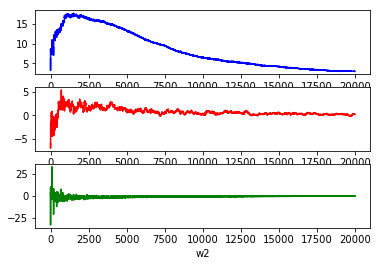

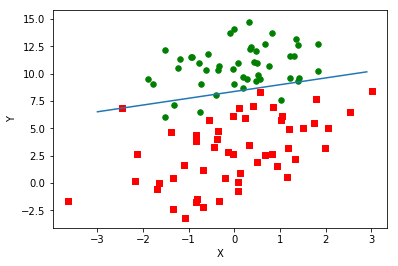

In [20]:
simpleTest()

# normal
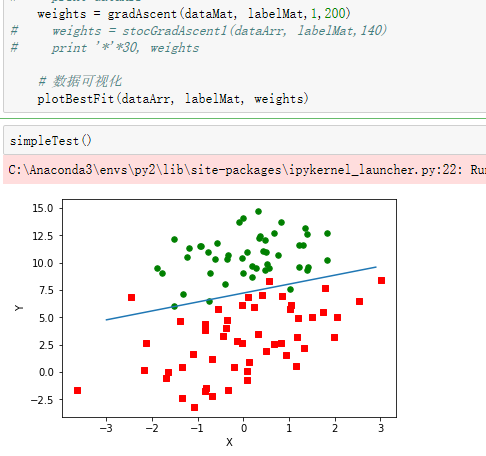

# developed
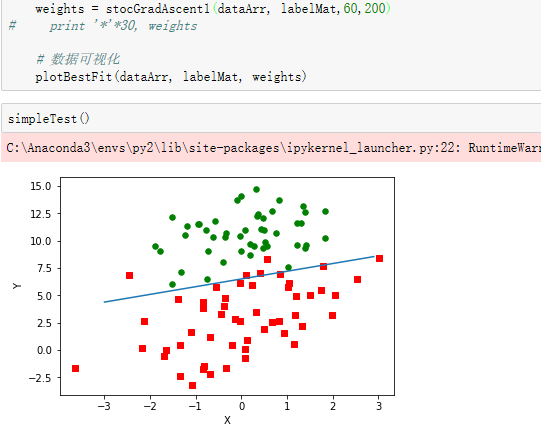
6,200这里打错了。。。

# 从疝气病症预测病马的死亡率

In [31]:
def classifyVector(inX, weights):
    '''
    Desc: 
        最终的分类函数，根据回归系数和特征向量来计算 Sigmoid 的值，大于0.5函数返回1，否则返回0
    Args:
        inX -- 特征向量，features
        weights -- 根据梯度下降/随机梯度下降 计算得到的回归系数
    Returns:
        如果 prob 计算大于 0.5 函数返回 1
        否则返回 0
    '''
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0
    
def colicTest():
    '''
    Desc:
        打开测试集和训练集，并对数据进行格式化处理
    Args:
        None
    Returns:
        errorRate -- 分类错误率
    '''
    frTrain = open('5.Logistic/horseColicTraining.txt')
    frTest = open('5.Logistic/horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    # 解析训练数据集中的数据特征和Labels
    # trainingSet 中存储训练数据集的特征，trainingLabels 存储训练数据集的样本对应的分类标签
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    # 使用 改进后的 随机梯度下降算法 求得在此数据集上的最佳回归系数 trainWeights
    trainWeights,trainWeights_record = stocGradAscent1(array(trainingSet), trainingLabels,5, 150)
    plotIteration(trainWeights_record)
    plotBestFit(array(trainingSet), trainingLabels, trainWeights)
    

    # 读取 测试数据集 进行测试，计算分类错误的样本条数和最终的错误率
    #error_count
    errorCount = 0
    #for total 测试样本
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(
                currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount) / numTestVec)
    print "the error rate of this test is: %f" % errorRate
    return errorRate

C:\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


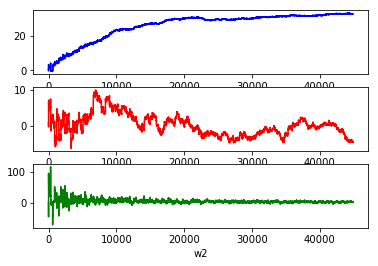

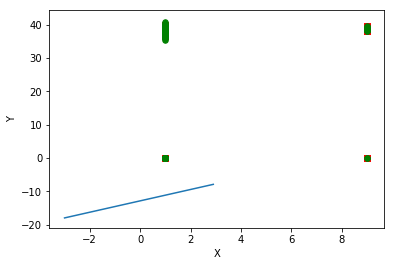

the error rate of this test is: 0.283582


0.2835820895522388

In [32]:
colicTest()

In [35]:
#调用colicTest() 10次并求结果的平均值
def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print '+'*100
    print "after %d iterations the average error rate is: %f" % (numTests, errorSum / float(numTests))

C:\Anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


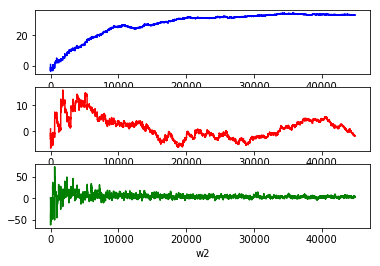

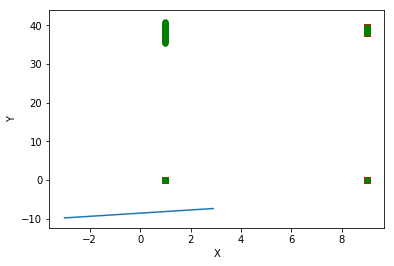

the error rate of this test is: 0.268657


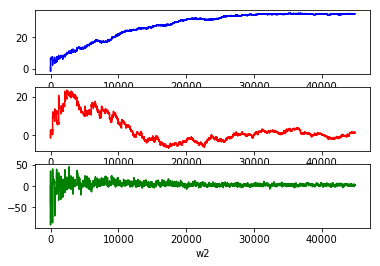

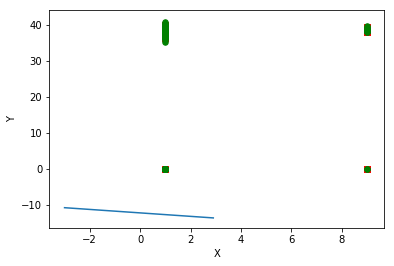

the error rate of this test is: 0.253731


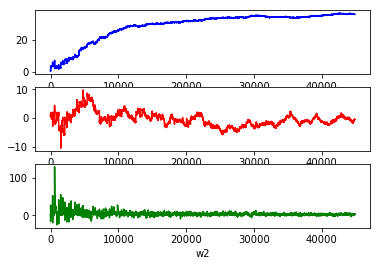

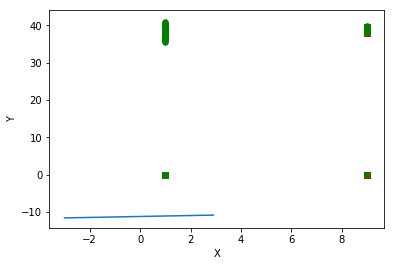

the error rate of this test is: 0.432836


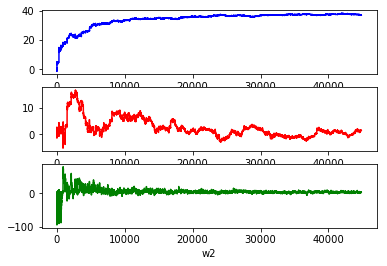

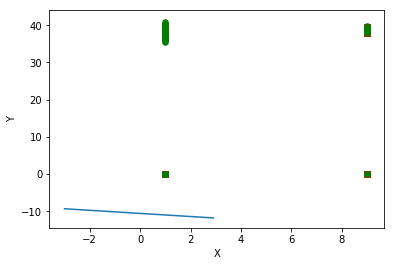

the error rate of this test is: 0.208955


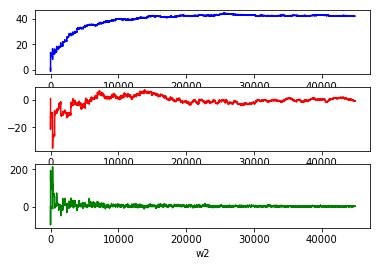

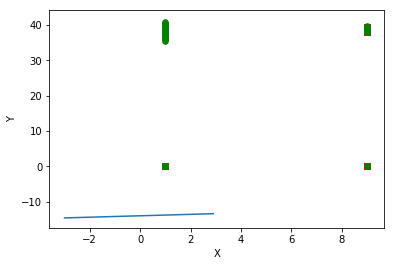

the error rate of this test is: 0.268657


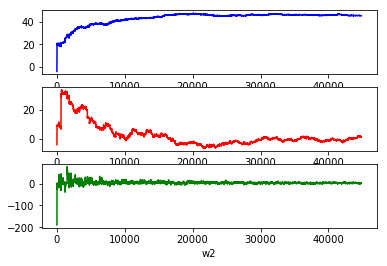

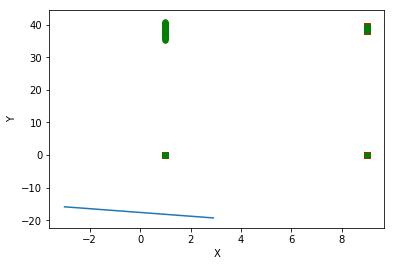

the error rate of this test is: 0.268657


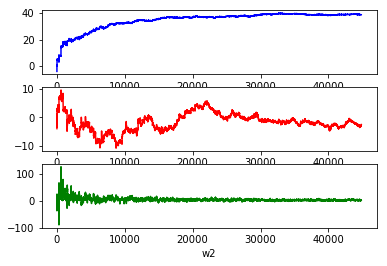

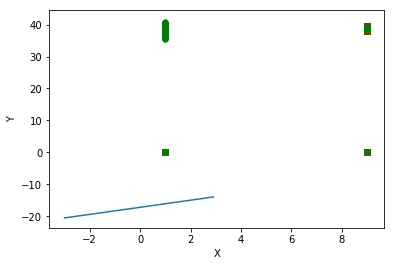

the error rate of this test is: 0.328358


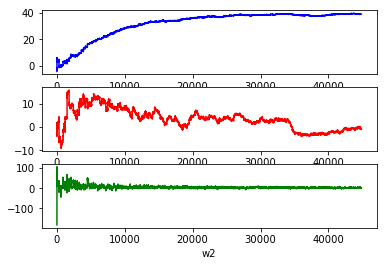

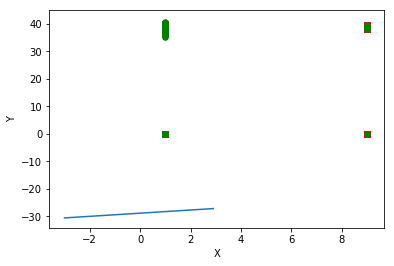

the error rate of this test is: 0.402985


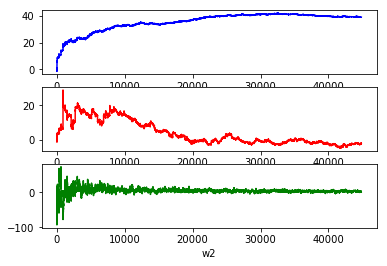

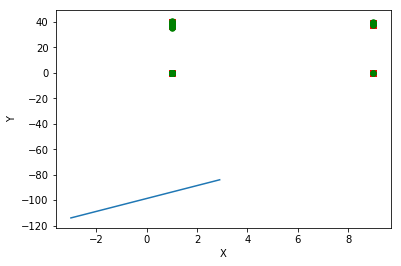

the error rate of this test is: 0.358209


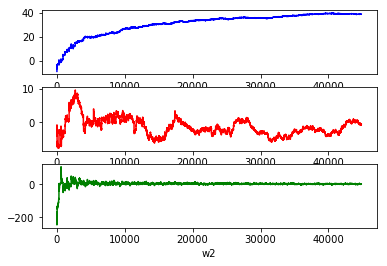

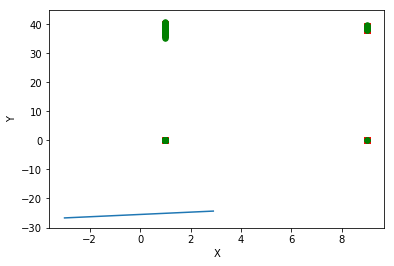

the error rate of this test is: 0.358209
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
after 10 iterations the average error rate is: 0.314925


In [36]:
multiTest()